## Based on discussion of the "Callan Periodic Table of Investment Returns" on Bogleheads.org

Discussion: https://www.bogleheads.org/forum/viewtopic.php?f=10&t=336650

Background and data source: https://www.bogleheads.org/wiki/Callan_periodic_table_of_investment_returns

Callan Institute: https://www.callan.com/periodic-table/

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np
from scipy import stats

%matplotlib inline

In [2]:
# import data
df = pd.read_csv("./callan.csv", index_col='Year')

In [3]:
df.style.format('{:,.2f}%')

,US Fixed Income,High Yield,Large Cap Equity,Global ex-US Fixed Income,Real Estate,Small Cap Equity,Cash Equivalent,Dev ex-US Equity,Emerging Market Equity
Year,,,,,,,,,
2001,8.43%,5.28%,-11.89%,-3.75%,-3.81%,2.49%,4.42%,-21.40%,-2.61%
2002,10.26%,-1.37%,-22.10%,22.37%,2.82%,-20.48%,1.76%,-15.80%,-6.16%
2003,4.10%,28.97%,28.68%,19.36%,40.69%,47.25%,1.15%,39.42%,55.82%
2004,4.34%,11.13%,10.88%,12.54%,37.96%,18.33%,1.33%,20.38%,25.55%
2005,2.43%,2.74%,4.91%,-8.65%,15.35%,4.55%,3.07%,14.47%,34.00%
2006,4.33%,11.85%,15.79%,8.16%,42.12%,18.37%,4.85%,25.71%,32.17%
2007,6.97%,1.87%,5.49%,11.03%,-7.39%,-1.57%,5.00%,12.44%,39.38%
2008,5.24%,-26.16%,-37.00%,4.39%,-48.21%,-33.79%,2.06%,-43.56%,-53.33%
2009,5.93%,58.21%,26.47%,7.53%,37.13%,27.17%,0.21%,33.67%,78.51%


In [4]:
# set RGB colors for plotting. Colors selected to match Callan table.
colors = {
    'US Fixed Income': (.41, .60, .41),
    'High Yield': (.85, .66, .26),
    'Large Cap Equity': (.08, .40, .59),
    'Global ex-US Fixed Income': (.58, .79, .57),
    'Real Estate': (.15, .60, .60),
    'Small Cap Equity': (.56, .66, .74),
    'Cash Equivalent': (.38, .61, .98),
    'Dev ex-US Equity': (.60, .60, .49),
    'Emerging Market Equity': (.96, .59, .21)
}

In [5]:
# abbreviations
abbrevs = {
    'US Fixed Income': 'US FI',
    'High Yield': 'Hi Yld',
    'Large Cap Equity': 'US LC',
    'Global ex-US Fixed Income': 'Intl FI',
    'Real Estate': 'Real Est',
    'Small Cap Equity': 'Small Cap',
    'Cash Equivalent': 'Cash',
    'Dev ex-US Equity': 'Intl Dev',
    'Emerging Market Equity': 'Intl Emg'
}

In [6]:
# common plot parameters
plot_size = (30, 18)
tick_size = 24
axes_size = 40
title_size= 50
legend_size = 24
suptitle_size = 30

In [7]:
def draw_box(year, pct, height, facecolor, edgecolor, alpha=1.0):
    '''helper function to create matplotlib rectangle'''
    # set lower left corner
    x = year - 0.5
    y = pct - (height / 2)
    
    # set width (dx) and height (dy) of rectangle
    dx = 1
    dy = height
    
    # create rectangle and add to plot
    rect = mpatches.Rectangle((x,y), dx, dy, facecolor=facecolor, edgecolor=edgecolor, alpha=alpha)
    ax.add_patch(rect)

In [8]:
# find max and min values for plot scaling
df_max = df.max().max()
df_min = df.min().min()

plt_y_max = round(df_max * 1.1, -1)
plt_y_min = round(df_min * 1.1, -1)

plt_x_max = df.index.max() + 1
plt_x_min = df.index.min() - 1

In [31]:
# plot settings

# toggle mini-lines
# set to True to display lines connecting rectangles of same asset class
# set to False to omit lines
mini_lines = False

# mini line weight. Value of 0.5 is good starting point
mini_line_weight = 0.5

#toggle min/max labels
min_max = False

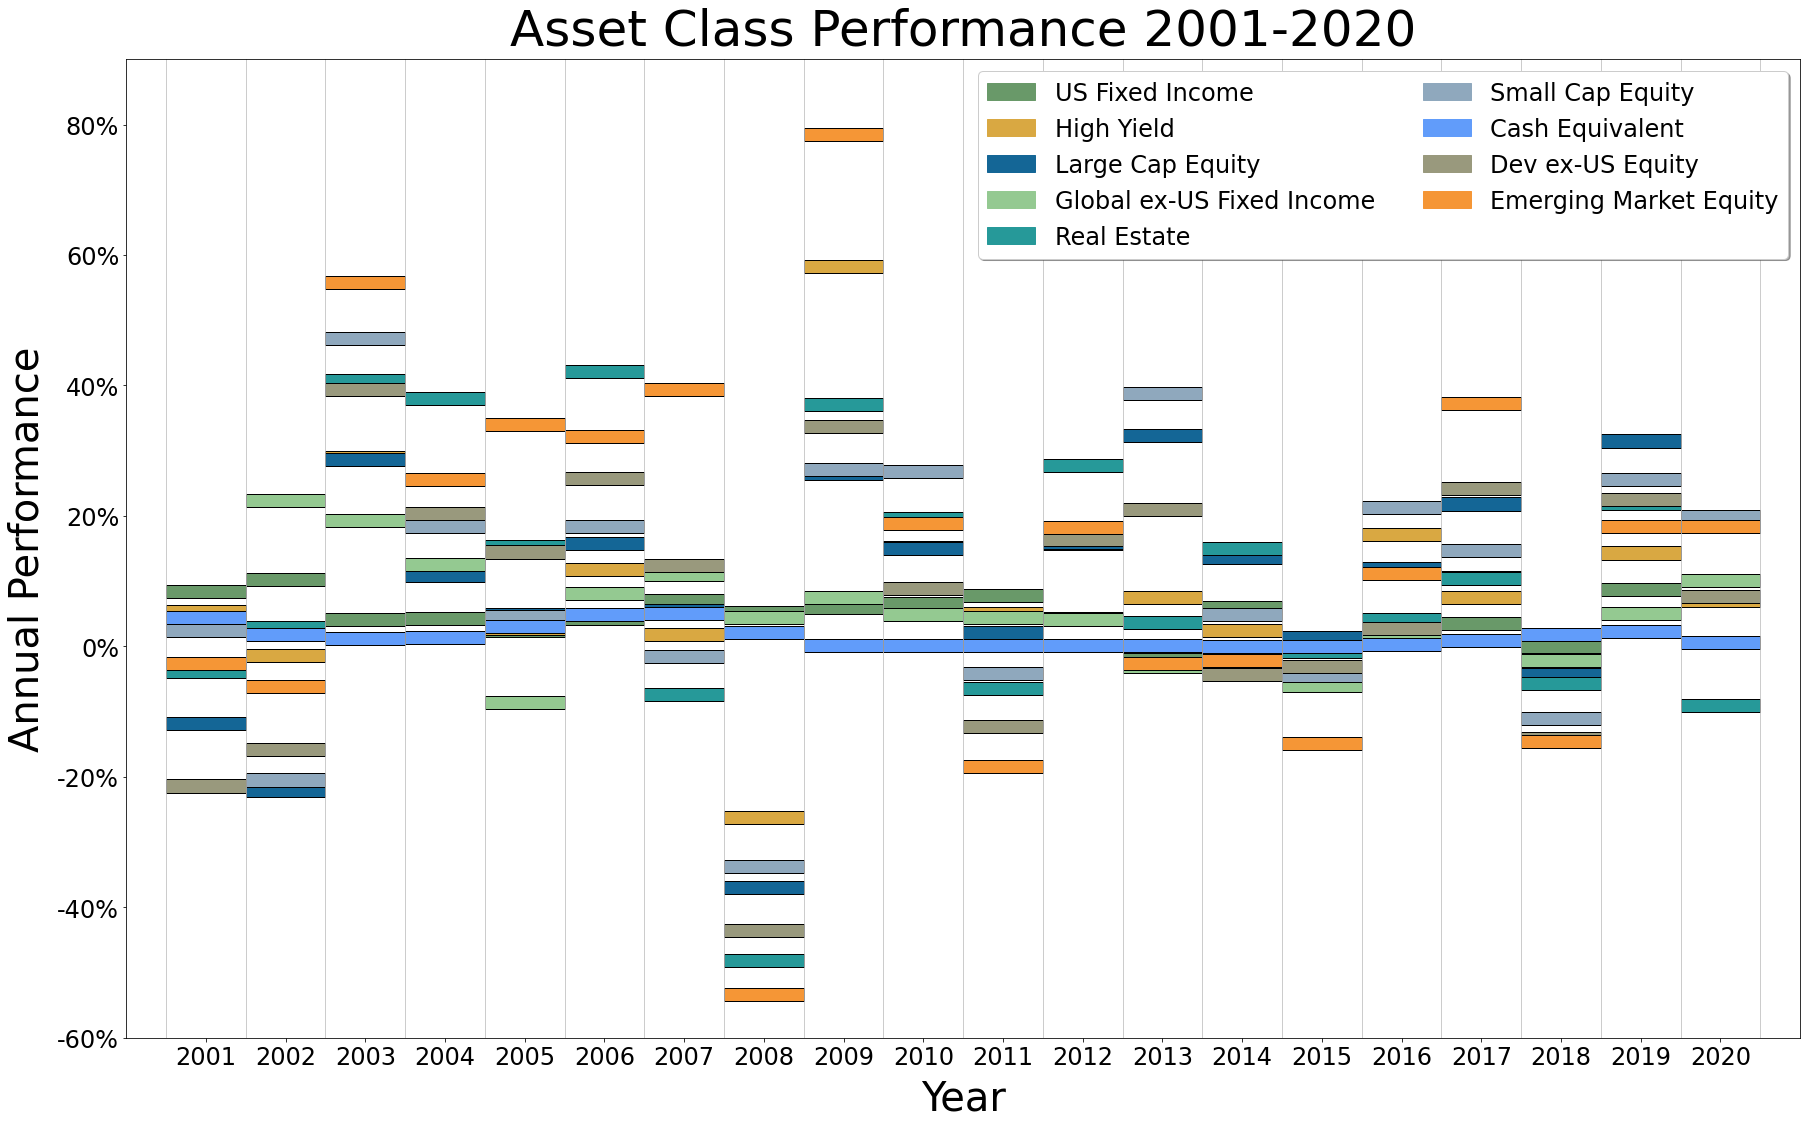

In [32]:
# create plot
fig, ax = plt.subplots(figsize=plot_size)

# set plot limits
plt.xlim([plt_x_min, plt_x_max])
plt.ylim([plt_y_min, plt_y_max])

# add vertical lines
for v in np.linspace(plt_x_min + 0.5, plt_x_max + 0.5, num=(plt_x_max - plt_x_min) + 1):
    plt.axvline(x=v, ymin=0, ymax=1, lw=0.8, color='silver')

# set parameters for rectangles
alpha = 1
height = 2
edgecolor = 'black'

# iterate through table values and call function to draw rectangles
for i in df.index:
    for c in df.columns:
        val = df[c].loc[i]
        draw_box(i, val, height, colors[c], edgecolor, alpha)
        
        # add label to max and min
        if min_max:
            if val == df.max(axis=1)[i]:
                ax.text(x=i, y=val+2, s=abbrevs[c], ha='center')
            if val == df.min(axis=1)[i]:
                plt.text(x=i, y=val-4, s=abbrevs[c], ha='center')

# plot with custom line colors
if mini_lines:
    for c in df.columns:
        plt.plot(df[c], color=colors[c], linewidth=mini_line_weight)
        
# create legend entries
legend = []
for c in df.columns:
    legend.append(mpatches.Patch(color=colors[c], label=c))

# draw legend
plt.legend(handles=legend, ncol=2, loc=1, framealpha=1, shadow=0.5, fontsize=legend_size)

# set axis ticks
ax.set_xticks(df.index)
plt.xticks(fontsize=tick_size)
plt.yticks(fontsize=tick_size)
plt.gca().yaxis.set_major_formatter(plt.matplotlib.ticker.StrMethodFormatter('{x:,.0f}%'))

# label axes and title
ax.set_xlabel('Year', fontsize=axes_size, labelpad=10)
ax.set_ylabel('Annual Performance', fontsize=axes_size, labelpad=10)
ax.set_title('Asset Class Performance 2001-2020', fontsize=title_size, pad=15)

# display plot        
plt.show()

line_name = '_lines' if mini_lines else ''
minmax_name = '_minmax' if min_max else ''
ax.figure.savefig(f"./images/callan_chart{line_name}{minmax_name}.png")

***

## Hypothetical Growth of $10K since end of 2000 

In [11]:
# create dataframe of annual returns
df_returns = df.copy()
df_returns = df_returns / 100 + 1

In [12]:
# calculate cumulative product and baseline to $10k starting investment

df_hg = df_returns.cumprod()*10000

# create a row to represent end of year 2000
df_hg.loc[2000] = [10000] * len(df_hg.columns)
df_hg.sort_index(inplace=True)

In [13]:
df_hg.style.format('{:,.0f}')

,US Fixed Income,High Yield,Large Cap Equity,Global ex-US Fixed Income,Real Estate,Small Cap Equity,Cash Equivalent,Dev ex-US Equity,Emerging Market Equity
Year,,,,,,,,,
2000,"10,000","10,000","10,000","10,000","10,000","10,000","10,000","10,000","10,000"
2001,"10,843","10,528","8,811","9,625","9,619","10,249","10,442","7,860","9,739"
2002,"11,955","10,384","6,864","11,778","9,890","8,150","10,626","6,618","9,139"
2003,"12,446","13,392","8,832","14,058","13,915","12,001","10,748","9,227","14,241"
2004,"12,986","14,882","9,793","15,821","19,197","14,201","10,891","11,107","17,879"
2005,"13,301","15,290","10,274","14,453","22,143","14,847","11,225","12,715","23,958"
2006,"13,877","17,102","11,896","15,632","31,470","17,574","11,770","15,984","31,665"
2007,"14,845","17,422","12,549","17,356","29,144","17,298","12,358","17,972","44,135"
2008,"15,622","12,864","7,906","18,118","15,094","11,453","12,613","10,143","20,598"


In [14]:
# find max and min values for plot scaling
df_hg_max = df_hg.max().max()
df_hg_min = df_hg.min().min()

plt_hg_y_max = round(df_hg_max * 1.1, -2)

plt_hg_x_max = df_hg.index.max() + 1
plt_hg_x_min = df_hg.index.min() - 1

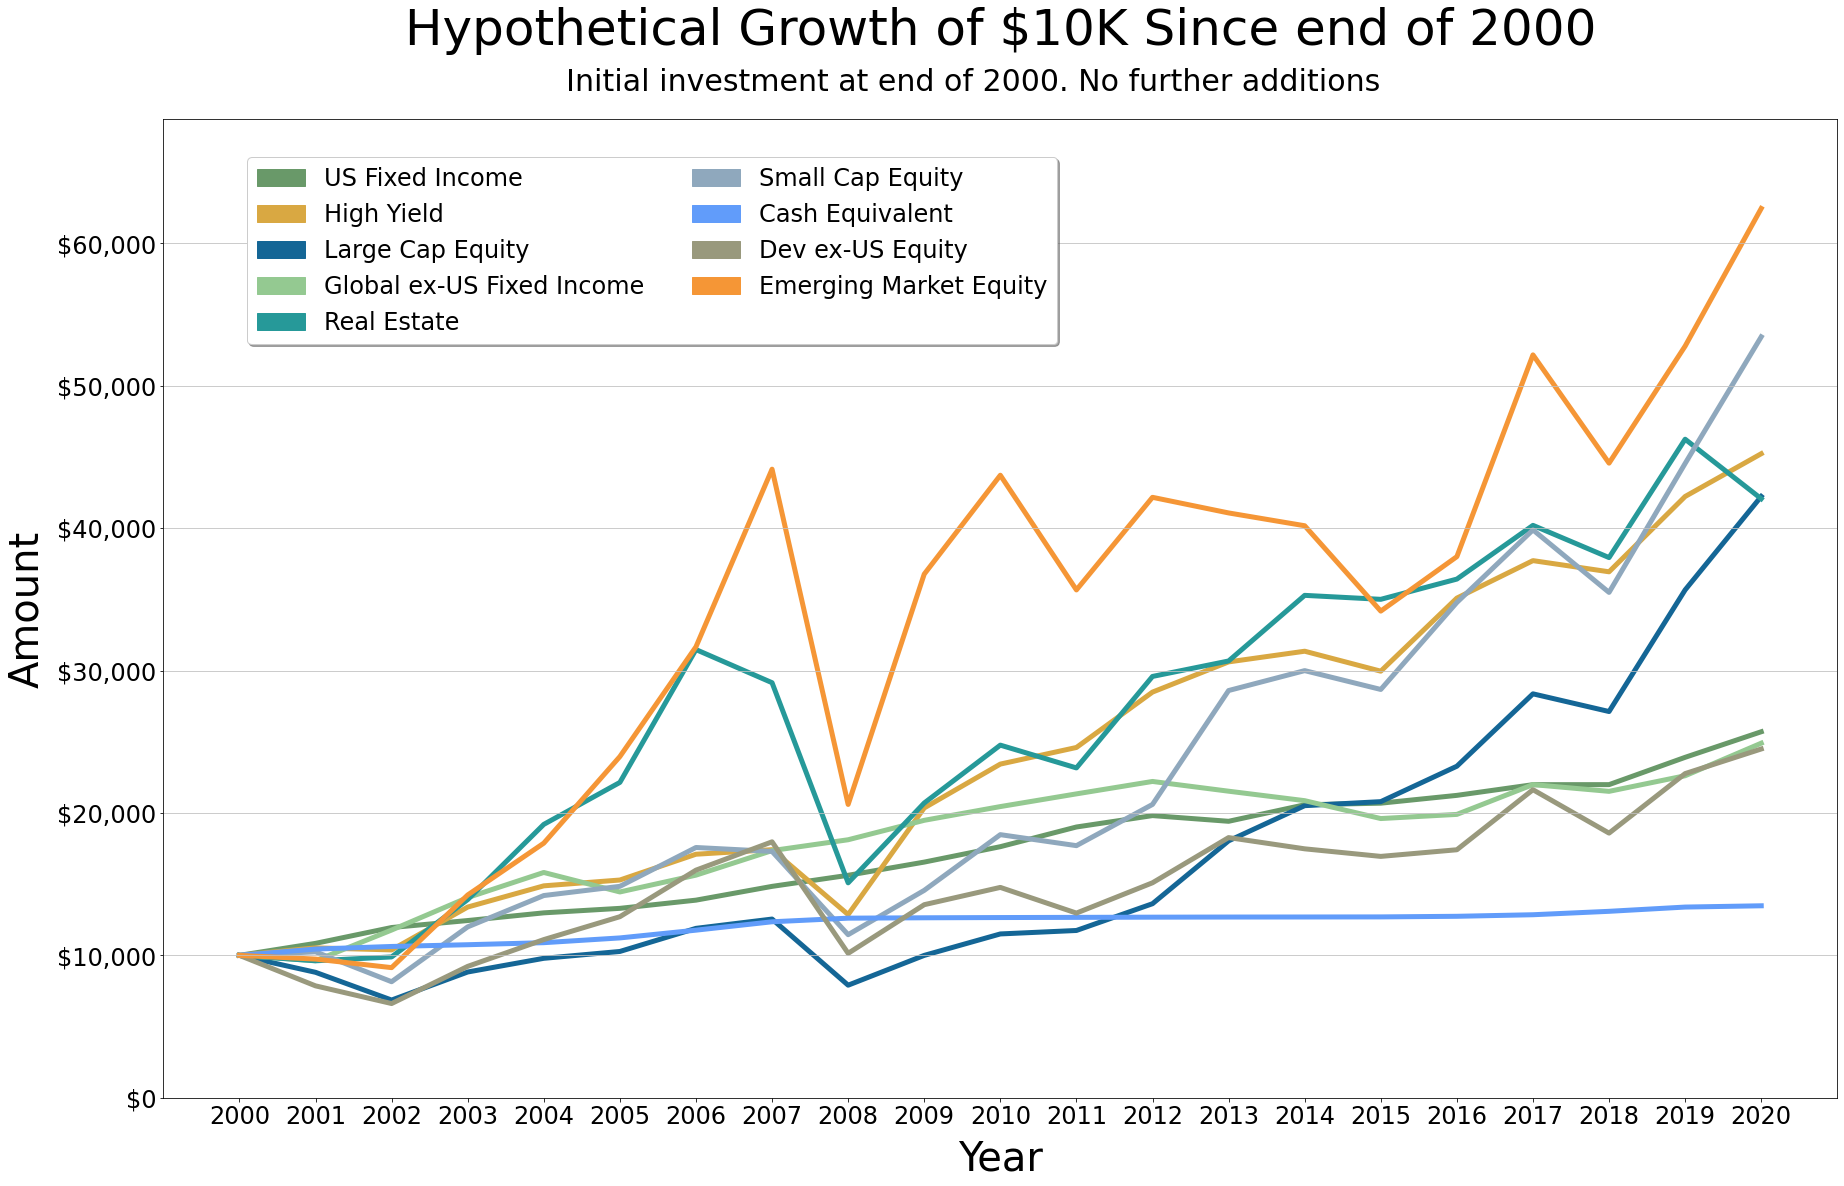

In [24]:
# create plot
fig, ax = plt.subplots(figsize=plot_size)

# set plot limits
plt.xlim([plt_hg_x_min, plt_hg_x_max])
plt.ylim([0, plt_hg_y_max])

# plot with custom line colors
for c in df_hg.columns:
    plt.plot(df_hg[c], color=colors[c], linewidth=5)
    
# add horizontal lines
topline = int(round(df_hg_max, -4))
for h in np.linspace(10000, topline, num=int(topline/10000)):
    plt.axhline(y=h, xmin=0, xmax=1, lw=0.8, color='silver')

# create legend entries
legend = []
for c in df_hg.columns:
    legend.append(mpatches.Patch(color=colors[c], label=c))

# draw legend
plt.legend(handles=legend, ncol=2, loc=(0.05, .77), framealpha=1, shadow=0.5, fontsize=legend_size)

# set axis ticks
ax.set_xticks(df_hg.index)
plt.xticks(fontsize=tick_size)
plt.yticks(fontsize=tick_size)
plt.gca().yaxis.set_major_formatter(plt.matplotlib.ticker.StrMethodFormatter('${x:,.0f}'))

# label axes and title
ax.set_xlabel('Year', fontsize=axes_size, labelpad=10)
ax.set_ylabel('Amount', fontsize=axes_size, labelpad=10)
plt.title('Hypothetical Growth of $10K Since end of 2000', fontsize=title_size, y=1.07)
plt.suptitle('Initial investment at end of 2000. No further additions', fontsize=suptitle_size, y=.92)

# display plot        
plt.show()

ax.figure.savefig("./images/callan_hyp_growth.png")

***

## Compount Annual Growth Rate

In [16]:
# create copy for CAGR

df_cagr = df.copy()

In [17]:
for c in df_cagr.columns:
    for i in df_cagr.index:
        df_cagr[c][i] = (stats.gmean(df_returns[c].loc[2001:i]) - 1) * 100

In [18]:
# create a row to represent end of year 2000
df_cagr.loc[2000] = [0] * len(df.columns)
df_cagr.sort_index(inplace=True)

df_cagr.style.format('{:.2f}%')

,US Fixed Income,High Yield,Large Cap Equity,Global ex-US Fixed Income,Real Estate,Small Cap Equity,Cash Equivalent,Dev ex-US Equity,Emerging Market Equity
Year,,,,,,,,,
2000,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%
2001,8.43%,5.28%,-11.89%,-3.75%,-3.81%,2.49%,4.42%,-21.40%,-2.61%
2002,9.34%,1.90%,-17.15%,8.53%,-0.55%,-9.72%,3.08%,-18.65%,-4.40%
2003,7.57%,10.23%,-4.05%,12.02%,11.64%,6.27%,2.43%,-2.65%,12.51%
2004,6.75%,10.45%,-0.52%,12.15%,17.71%,9.16%,2.16%,2.66%,15.63%
2005,5.87%,8.86%,0.54%,7.64%,17.23%,8.22%,2.34%,4.92%,19.09%
2006,5.61%,9.36%,2.94%,7.73%,21.06%,9.85%,2.75%,8.13%,21.18%
2007,5.81%,8.25%,3.30%,8.20%,16.51%,8.14%,3.07%,8.74%,23.63%
2008,5.73%,3.20%,-2.89%,7.71%,5.28%,1.71%,2.94%,0.18%,9.45%


In [19]:
# find max and min values for plot scaling
df_cagr_max = df_cagr.max().max()
df_cagr_min = df_cagr.min().min()


plt_cagr_y_max = round(df_cagr_max * 1.1, 1)
plt_cagr_y_min = round(df_cagr_min * 1.5, 1)

plt_cagr_x_max = df_cagr.index.max() + 1
plt_cagr_x_min = df_cagr.index.min() - 1

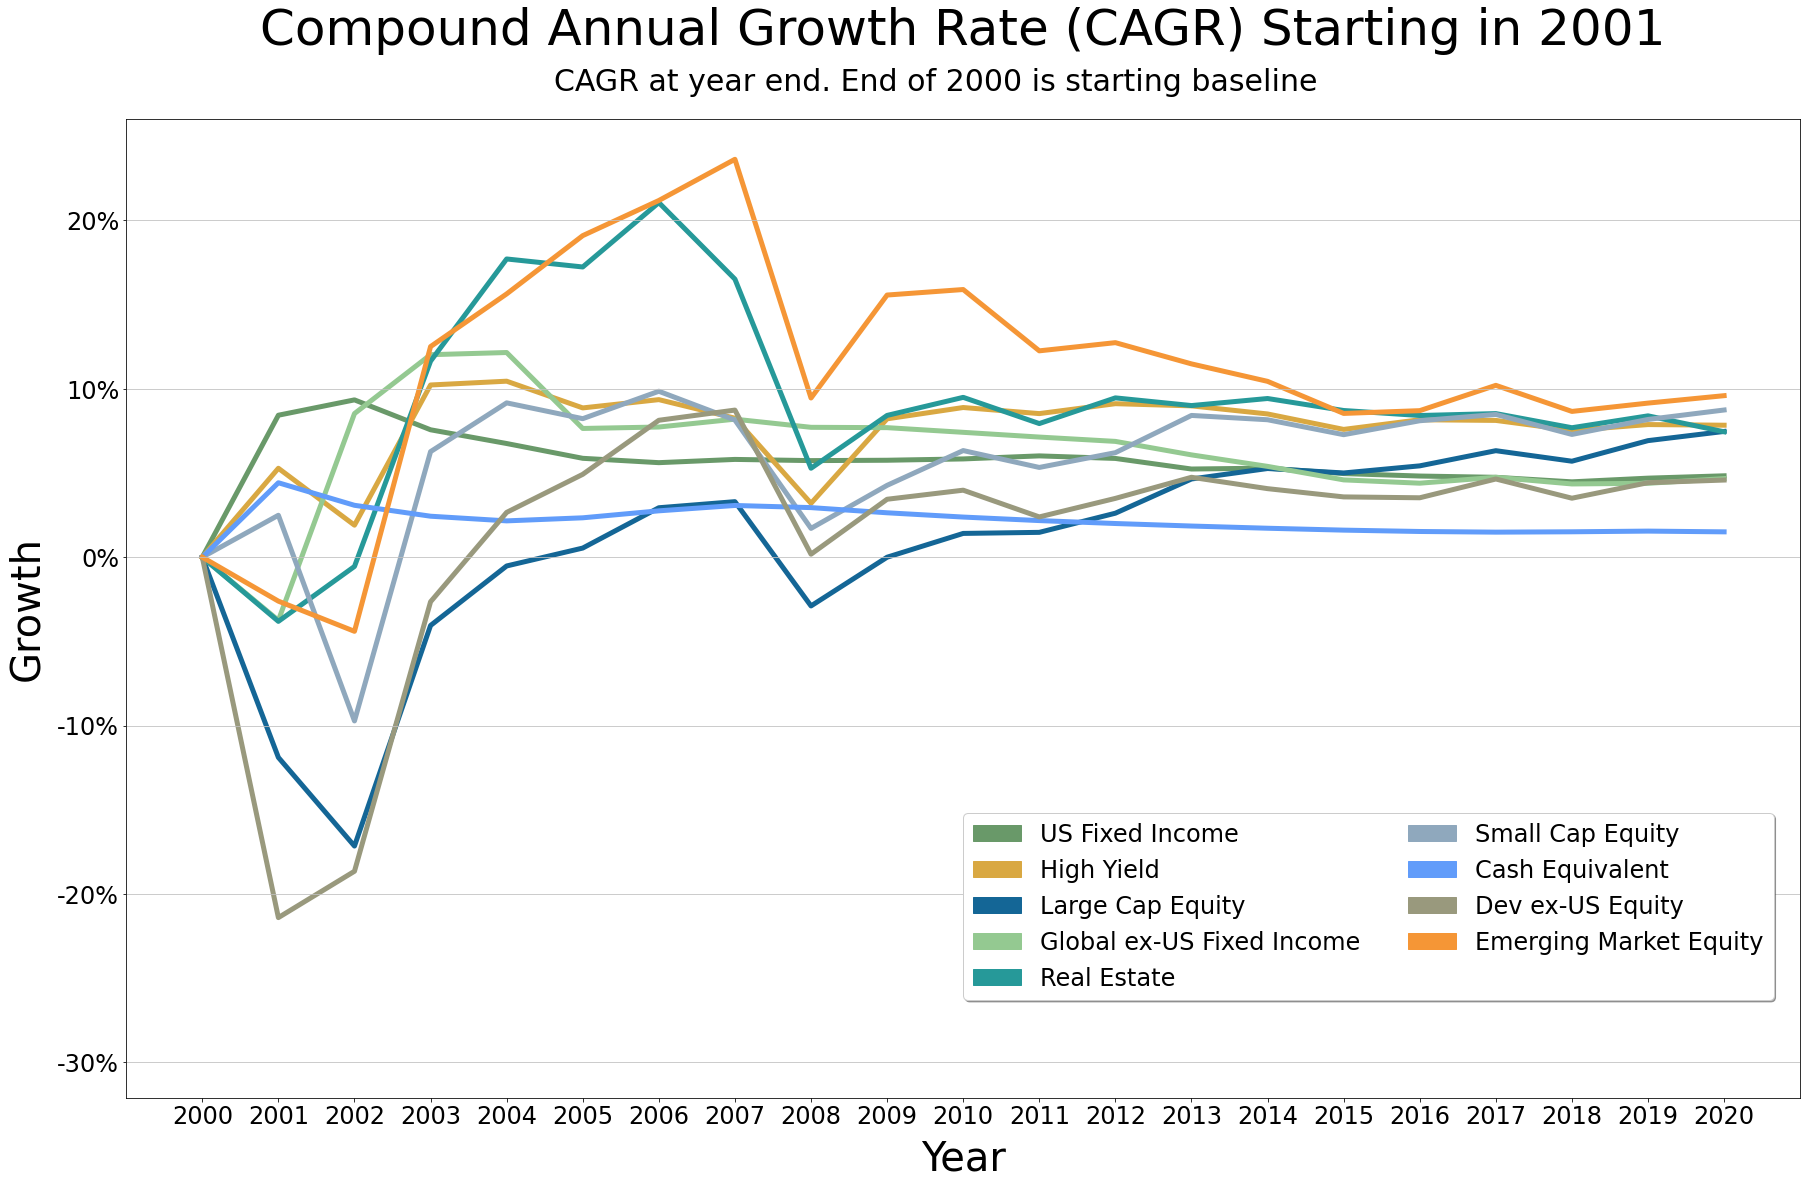

In [21]:
# create plot
fig, ax = plt.subplots(figsize=plot_size)

# set plot limits
plt.xlim([plt_cagr_x_min, plt_cagr_x_max])
plt.ylim([plt_cagr_y_min, plt_cagr_y_max])

# plot with custom line colors
for c in df_cagr.columns:
    plt.plot(df_cagr[c], color=colors[c], linewidth=5)

# add horizontal lines
topline = int(round(df_cagr_max, -1))
bottomline = int(round(df_cagr_min, -1)) - 10
for h in np.linspace(bottomline, topline, num=int((topline-bottomline)/10) + 1):
    plt.axhline(y=h, xmin=0, xmax=1, lw=0.8, color='silver')
    
# create legend entries
legend = []
for c in df_cagr.columns:
    legend.append(mpatches.Patch(color=colors[c], label=c))

# draw legend
plt.legend(handles=legend, ncol=2, loc=(0.5, 0.1), framealpha=1, shadow=0.5, fontsize=legend_size)

# set axis ticks
ax.set_xticks(df_cagr.index)
plt.xticks(fontsize=tick_size)
plt.yticks(fontsize=tick_size)
plt.gca().yaxis.set_major_formatter(plt.matplotlib.ticker.StrMethodFormatter('{x:,.0f}%'))


# label axes and title
ax.set_xlabel('Year', fontsize=axes_size, labelpad=10)
ax.set_ylabel('Growth', fontsize=axes_size, labelpad=10)
plt.title('Compound Annual Growth Rate (CAGR) Starting in 2001', fontsize=title_size, y=1.07)
plt.suptitle('CAGR at year end. End of 2000 is starting baseline', fontsize=suptitle_size, y=.92)

# display plot        
plt.show()

ax.figure.savefig("./images/callan_cagr.png")